In [ ]:
# 3. Úvod do lineární algebry

In [36]:
# Gaussova eliminační metoda

import numpy as np

def gaussova_eliminacni_metoda(A, b): # A = matice koeficientů neznámých, b = vektor výsledků jednotlivých rovnic soustavy
    # Získání počtu koeficientů (počet rovnic)
    pocet_rovnic = len(A)
    
    # Vytvoření rozšířené matice spojením matice A s vektorem b
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)   # přetypování na desetinné číslo
    display(rozsirena_matice)

    # Přímá eliminace
    for i in range(pocet_rovnic):
        # Eliminace prvků pod vedoucím prvkem 
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]


    # Zpětná substituce
    x = np.zeros(pocet_rovnic)  # vytvoření pole x, naplněného nulovými hodnotami, za které se pak dosadí daná řešení
    for i in range(pocet_rovnic - 1, -1, -1): # procházení matice v horním trojúhelníkovém tvaru od posledního řádku k prvnímu
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i]  # zjištění daného řešení
    
    return x

A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])
b = np.array([8, -11, -3])

reseni = gaussova_eliminacni_metoda(A, b)
print("\nŘešení soustavy lineárních rovnic:")
print(reseni)
print("\nOvěření pomocí numpy.linalg.solve:")
print(np.linalg.solve(A, b))


array([[  2.,   1.,  -1.,   8.],
       [ -3.,  -1.,   2., -11.],
       [ -2.,   1.,   2.,  -3.]])


Řešení soustavy lineárních rovnic:
[ 2.  3. -1.]

Ověření pomocí numpy.linalg.solve:
[ 2.  3. -1.]


In [34]:
import numpy as np

def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_)  # vytvoření vektoru řešení 
    for pocet_iteraci in range(1, max_iteraci+1):

        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        # break pokud je rozdíl mezi řešeními menší než tolerance (výchozí =1e-10)
        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci # přiřazení hodnoty x
    return x

C = np.array([[3,-2,5],
              [1,1,2],
              [-2,1,-6]])
c = np.array([-7,4,6])

reseni = gaussova_seidelova_iterace(C,c)
print("Výsledek soustavy lineárních rovnic:")
print(reseni)


Výsledek soustavy lineárních rovnic:
[ 2.          3.99999999 -1.        ]


In [80]:
# Matice 1x1
A = np.array([[1]])
a = np.array([2])

# Matice 2x2
B = np.array([[1,1],
             [2,-1]])
b = np.array([8,1])

# Matice 3x3
C = np.array([[3,-2,5],
              [1,1,2],
              [-2,1,-6]])
c = np.array([-7,4,6])

# Matice 4x4
D = np.array([[10, -1, 2, 0],
        [-1, 11, -1, 3],
        [2, -1, 10, -1],
        [0, 3, -1, 8]])
d = np.array([6, 25, -11, 15])

# Matice 5x5
E = np.array([[5,7,9,-28,1],
              [-3,0,12,5,0],
              [2,7,19,-23,1],
              [1,1,1,-1,1],
              [0,5,17,-21,3]])
e = np.array([-14,25,11,0,11])


###############################################################################################################xx

import numpy as np
def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

E = np.array([[2, -1, 0, 0, 0],
              [-1, 2, -1, 0, 0],
              [0, -1, 2, -1, 0],
              [0, 0, -1, 2, -1],
              [0, 0, 0, -1, 2]])
e = np.array([1, 2, 3, 4, 5])

print("Řešení přímou metodou:")
print(gaussova_eliminacni_metoda(A,a))
print(gaussova_eliminacni_metoda(B,b))
print(gaussova_eliminacni_metoda(C,c))
print(gaussova_eliminacni_metoda(D,d))
print(gaussova_eliminacni_metoda(E,e))

###############################################################################################################
print("Správné řešení:")
print(np.linalg.solve(A,a))
print(np.linalg.solve(B,b))
print(np.linalg.solve(C,c))
print(np.linalg.solve(D,d))
print(np.linalg.solve(E,e))
################################################################################################################
def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

def gauss_seidel(A, b, niteraci, x0=np.ones(len(A))):
    x = x0
    U = np.triu(A, k = 1)
    Lstar = np.tril(A, k = 0)               #D + L
    T = np.matmul(-np.linalg.inv(Lstar), U) #T = -invL* . U
    C = np.matmul(np.linalg.inv(Lstar), b)  #C = invL . b
    for i in range(niteraci):
        x = np.matmul(T, x) + C             #inv(D+L).(b-U.x) = inv(Lstar).(b-U.x) = C + T => x = Tx + C
        print("iterace:",i, "x=",x)
    return x

print("Řešení iterační metodou:")
print(gaussova_seidelova_iterace(A,a))
print(gaussova_seidelova_iterace(B,b))
print(gaussova_seidelova_iterace(C,c))
print(gaussova_seidelova_iterace(D,d))
print(gaussova_seidelova_iterace(E,e))


Řešení přímou metodou:
[2.]
[3. 5.]
[ 2.  4. -1.]
[ 1.  2. -1.  1.]
[ 5.83333333 10.66666667 13.5        13.33333333  9.16666667]
Správné řešení:
[2.]
[3. 5.]
[ 2.  4. -1.]
[ 1.  2. -1.  1.]
[ 5.83333333 10.66666667 13.5        13.33333333  9.16666667]
Řešení iterační metodou:
[2.]
[-2.67877152e+301 -5.35754304e+301]
[ 2.          3.99999999 -1.        ]
[ 1.  2. -1.  1.]
[ 5.83333331 10.66666663 13.49999996 13.3333333   9.16666665]


In [4]:
import numpy as np

def generuj_ctvercovoumatici(velikost, min_hodnota=1, max_hodnota=10):
    return np.random.randint(min_hodnota, max_hodnota, (velikost, velikost))

def generuj_pravoustranu(velikost, min_hodnota=1, max_hodnota=10):
    return np.random.randint(min_hodnota, max_hodnota, velikost)

A = generuj_ctvercovoumatici(3)
a = generuj_pravoustranu(3)
print(A)
print(a)


[[9 2 2]
 [2 3 7]
 [9 5 5]]
[2 7 9]


In [109]:
def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.random.rand(len(b))  # Inicializace vektoru řešení náhodnými hodnotami
    for pocet_iteraci in range(1, max_iteraci+1):

        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        # Přiřazení nového řešení
        x = x_po_iteraci 

        # Kritérium ukončení: pevný počet iterací
        if pocet_iteraci >= max_iteraci:
            break
            
    return x

E = np.array([[5,7,9,-28,1],
              [-3,0,12,5,0],
              [2,7,19,-23,1],
              [1,1,1,-1,1],
              [0,5,17,-21,3]])
e = np.array([-14,25,11,0,11])
print(gaussova_seidelova_iterace(E,e))



[nan nan nan nan nan]


C:\Users\filip\AppData\Local\Temp\ipykernel_20188\618221918.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]


In [132]:
# Matice 1x1
import time
import numpy as np
A = np.array([[1]])
a = np.array([2])

start = time.perf_counter()
def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

a_prima = gaussova_eliminacni_metoda(A,a)
end = time.perf_counter()
print(a_prima)
cas_a_prima = end-start






[2.]


In [131]:
# Matice 2x2
import time
import numpy as np
B = np.array([[1,1],
             [2,-1]])
b = np.array([8,1])

start = time.perf_counter()
def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

b_prima = gaussova_eliminacni_metoda(B,b)
end = time.perf_counter()
print(a_prima)
cas_b_prima = end-start

[2.]


In [130]:
# Matice 3x3
import numpy as np
import time
C = np.array([[3,-2,5],
              [1,1,2],
              [-2,1,-6]])
c = np.array([-7,4,6])

start = time.perf_counter()
def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

c_prima = gaussova_eliminacni_metoda(C,c)
end = time.perf_counter()
print(a_prima)
cas_c_prima = end-start

[2.]


In [129]:
# Matice 4x4
import numpy as np
import time
D = np.array([[10, -1, 2, 0],
        [-1, 11, -1, 3],
        [2, -1, 10, -1],
        [0, 3, -1, 8]])
d = np.array([6, 25, -11, 15])

start = time.perf_counter()
def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

d_prima = gaussova_eliminacni_metoda(D,d)
end = time.perf_counter()
print(a_prima)
cas_d_prima = end-start

[2.]


In [128]:
# Matice 5x5
import numpy as np
import time
E = np.array([[5,7,9,-28,1],
              [-3,0,12,5,0],
              [2,7,19,-23,1],
              [1,1,1,-1,1],
              [0,5,17,-21,3]])
e = np.array([-14,25,11,0,11])

start = time.perf_counter()
def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

e_prima = gaussova_eliminacni_metoda(E,e)
end = time.perf_counter()
print(a_prima)
cas_e_prima = end-start

[2.]


In [115]:
# Matice 1x1 
import time
import numpy as np
A = np.array([[1]])
a = np.array([2])

start = time.perf_counter()
def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

a_iteracni = gaussova_seidelova_iterace(A,a)
end = time.perf_counter()
print(a_iteracni)
cas_a_iteracni = end-start




[2.]


In [127]:
# Matice 2x2
import time
import numpy as np
B = np.array([[1,1],
             [2,-1]])
b = np.array([8,1])

start = time.perf_counter()
def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

b_iteracni = gaussova_seidelova_iterace(B,b)
end = time.perf_counter()
print(-1 * a_iteracni)
cas_b_iteracni = end-start


[nan nan nan nan nan]


In [126]:
# Matice 3x3
import time
import numpy as np
C = np.array([[3,-2,5],
              [1,1,2],
              [-2,1,-6]])
c = np.array([-7,4,6])
start = time.perf_counter()
def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

c_iteracni = gaussova_seidelova_iterace(C,c)
end = time.perf_counter()
print(-1 * a_iteracni)
cas_c_iteracni = end-start

[nan nan nan nan nan]


In [125]:
# Matice 4x4
import time
import numpy as np
D = np.array([[10, -1, 2, 0],
        [-1, 11, -1, 3],
        [2, -1, 10, -1],
        [0, 3, -1, 8]])
d = np.array([6, 25, -11, 15])
start = time.perf_counter()
def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

d_iteracni = gaussova_seidelova_iterace(D,d)
end = time.perf_counter()
print(-1 * a_iteracni)
cas_d_iteracni = end-start

[nan nan nan nan nan]


In [124]:
# Matice 5x5
import time
import numpy as np
E = np.array([[-3,0,12,5,0],
              [5,7,9,-28,1],
              [2,7,19,-23,1],
              [1,1,1,-1,1],
              [0,5,17,-21,3]])
e = np.array([-14,25,11,0,11])
start = time.perf_counter()
def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

e_iteracni = gaussova_seidelova_iterace(E,e)
end = time.perf_counter()
print(-1 * a_iteracni)
cas_e_iteracni = end-start

[nan nan nan nan nan]


ValueError: x and y must be the same size

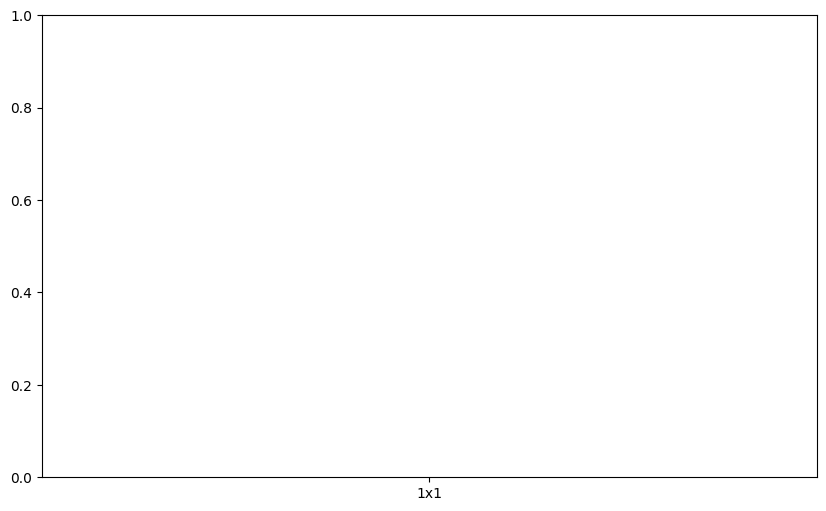

In [136]:
import matplotlib.pyplot as plt
matice = ["1x1","2x2","3x3","4x4","5x5"]
casy_prima = [cas_a_prima,cas_c_prima,cas_d_prima]
casy_iteracni = [cas_a_iteracni,cas_c_iteracni,cas_d_iteracni]

plt.figure(figsize=(10,6))
plt.scatter(matice,casy_prima,"o",color="r")
plt.scatter(matice,casy_iteracni,"o",color="b")
plt.show()

